PRECIPITAÇÃO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [2]:
f = "../../Weather Station Data/Llanganuco_PORTWX_17Jul06_28Jun14.csv"

df = pd.read_csv(f, encoding="latin1")

In [3]:
grafico1 = df

In [4]:
# Transforma a coluna Datetime em formato de data
grafico1['Datetime'] = pd.to_datetime(grafico1['Datetime'], format= '%m/%d/%Y %H:%M')

# Cria um index para todas as variaveis com a coluna Datetime
grafico1.set_index('Datetime', inplace=True)

#Calcula a soma diária de todos os dias no conjunto de dados
soma_diaria = grafico1["Precipitation (mm)"].resample('D').sum()



In [5]:

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()# Converter as datas para string no formato desejado
somas = soma_diaria.tolist() # Converter as somas para uma lista
datas = pd.to_datetime(datas) # Conveter a data para formato datetime
df = pd.DataFrame({'data': datas , "soma": somas}) # criação da dataframe

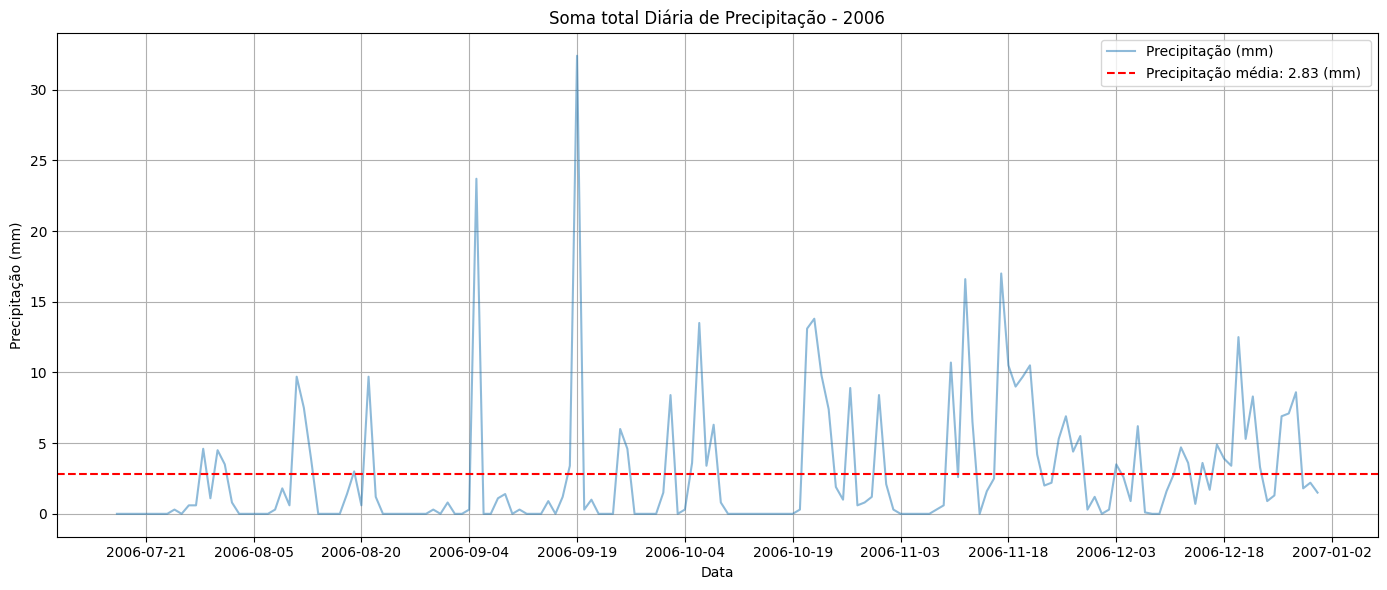

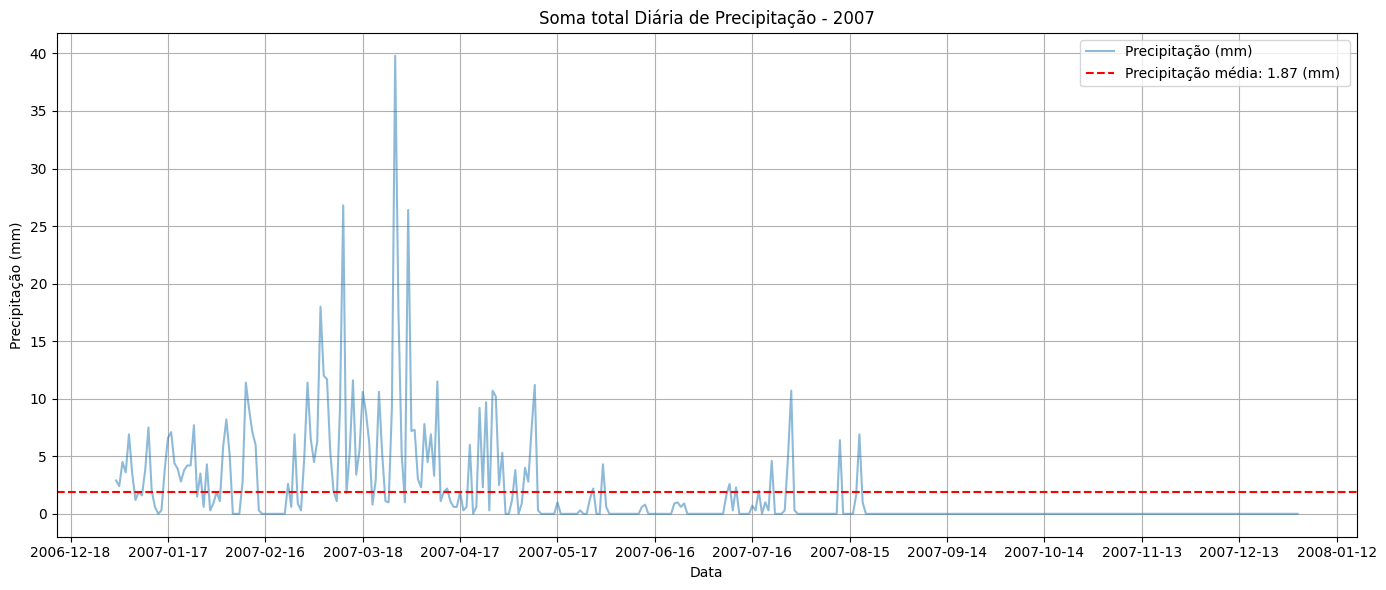

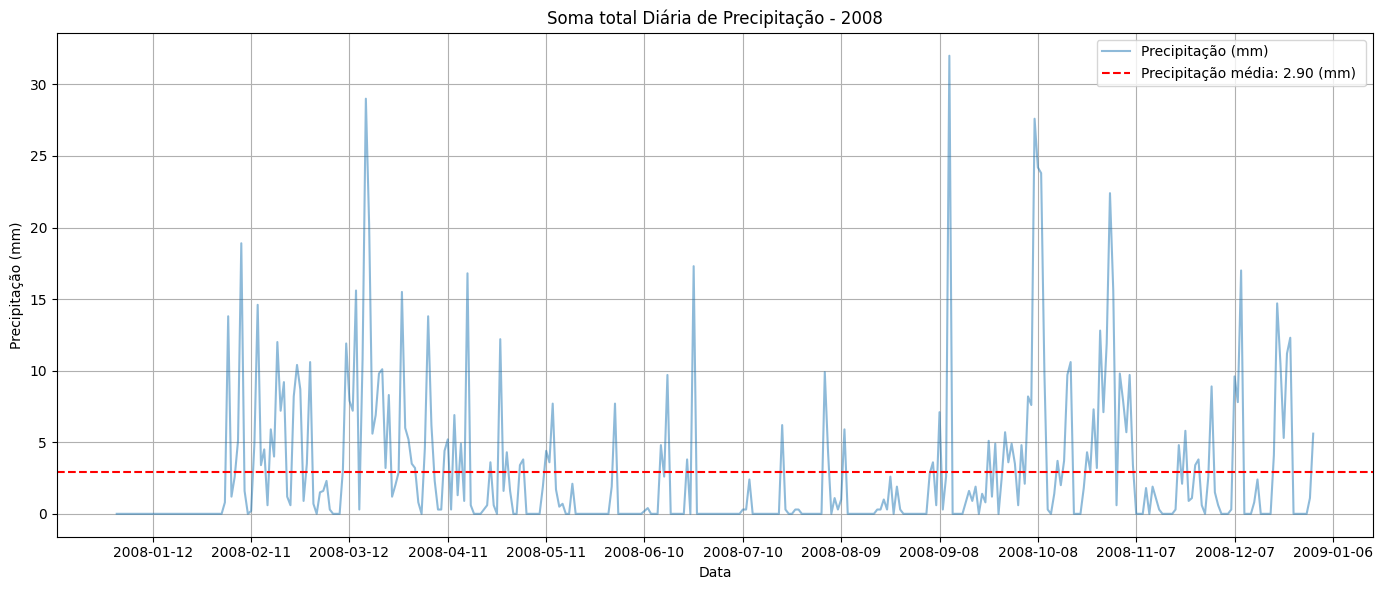

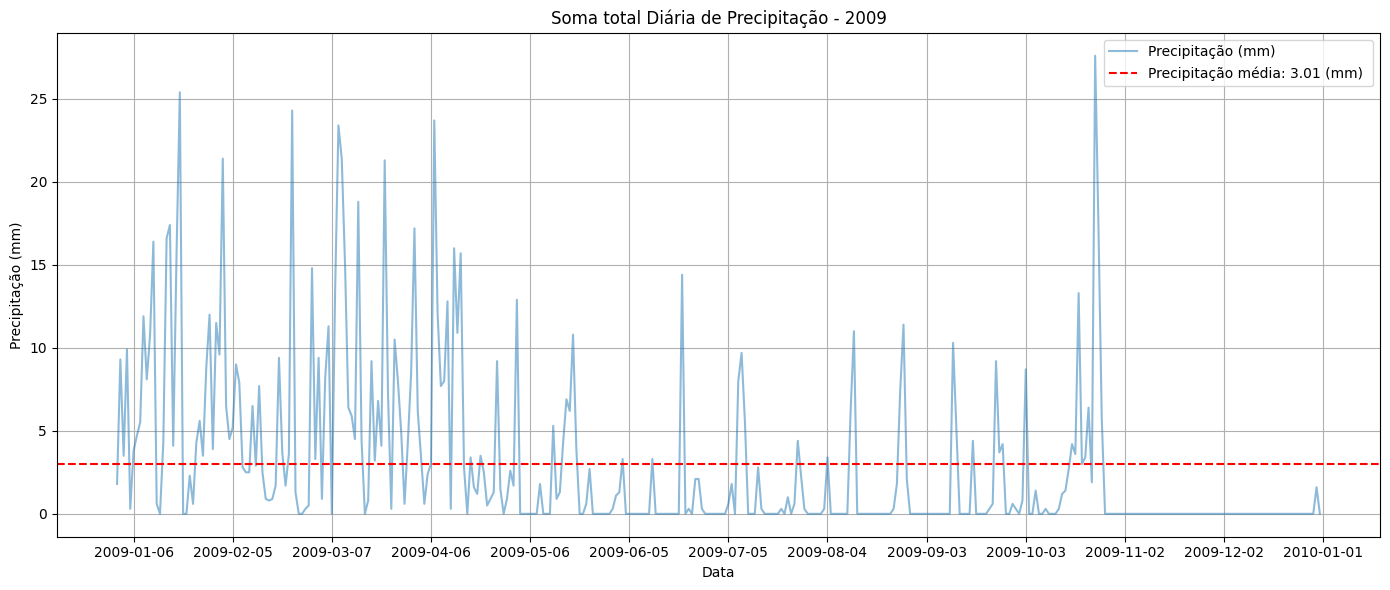

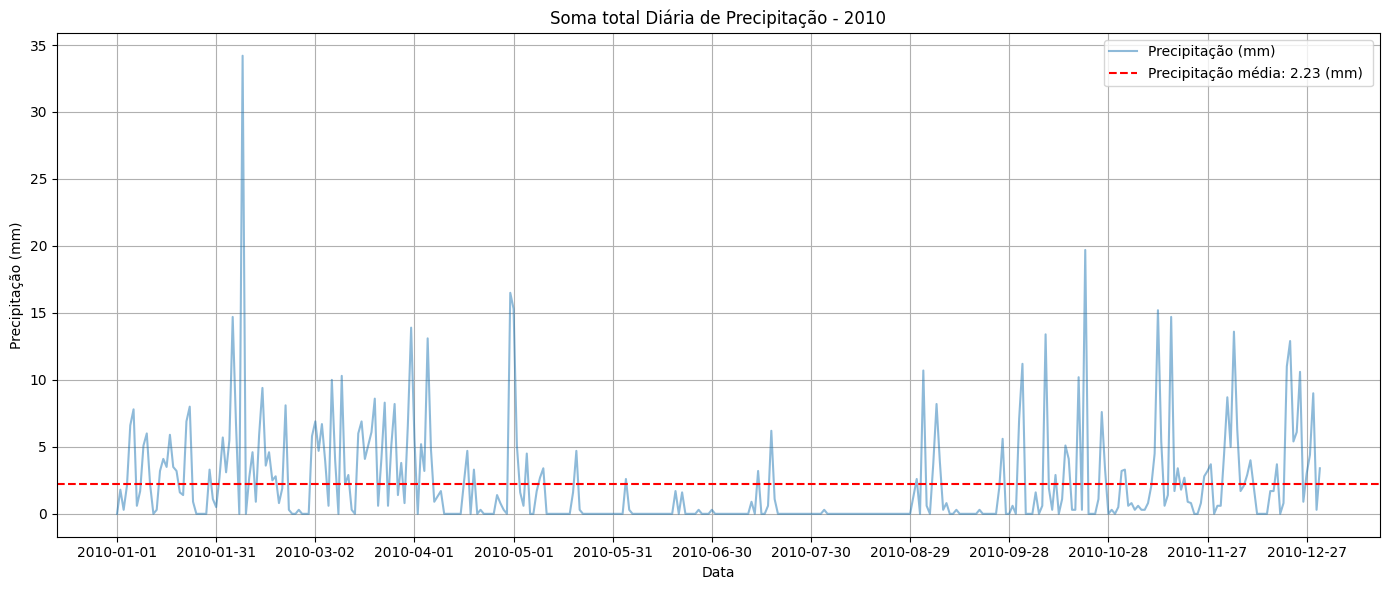

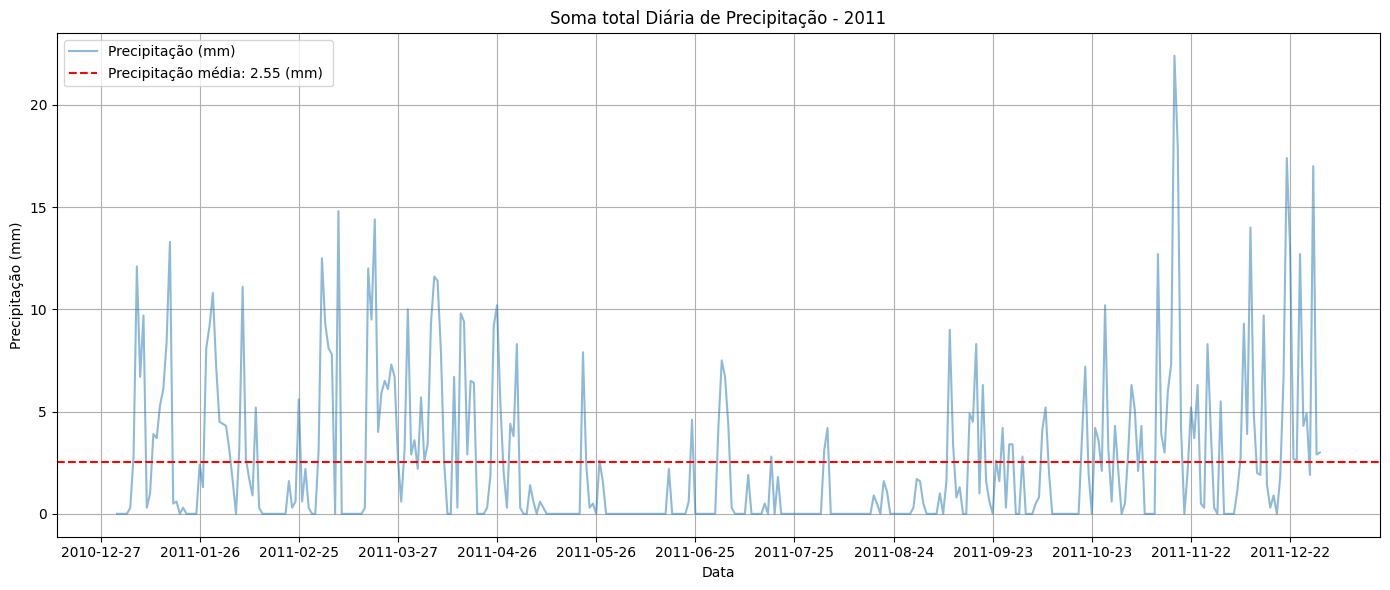

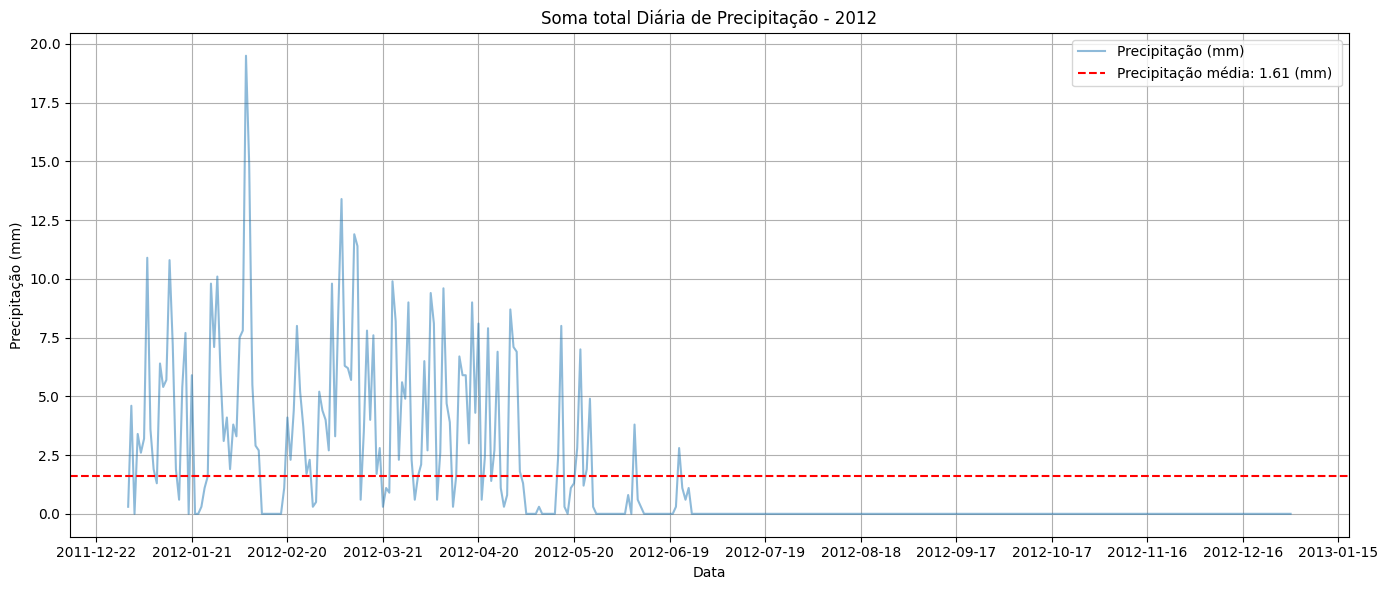

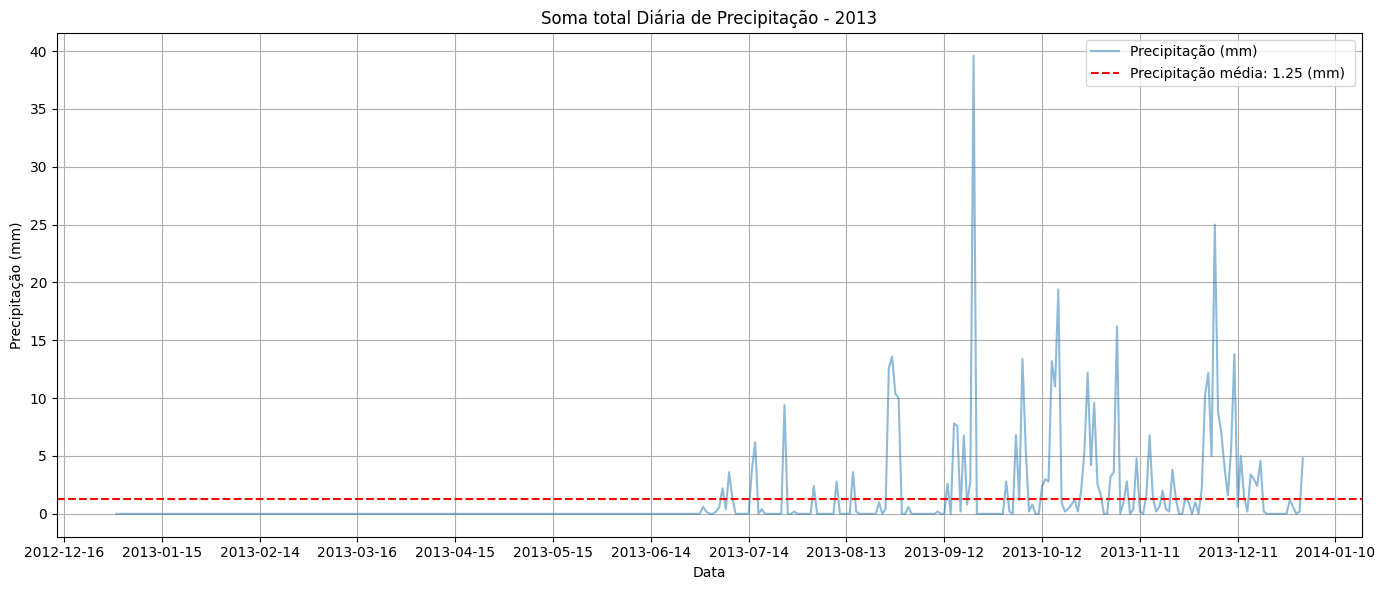

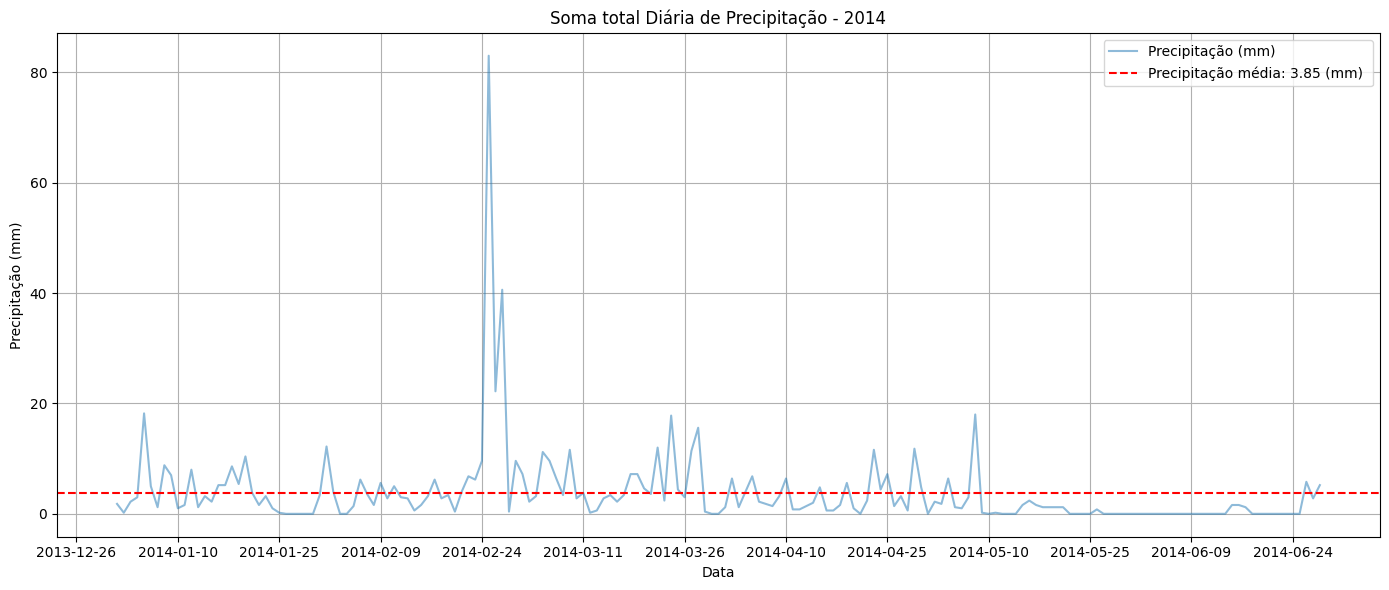

In [6]:
# Cria uma lista com os anos que possui no conjunto de dados
anos_unicos = df['data'].dt.year.unique()

for ano in anos_unicos:

    # Filtrar os dados para o ano atual
    df_ano = df[df["data"].dt.year ==  ano]

    #Criação do grafico

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df_ano["data"], df_ano['soma'], label=f"Precipitação (mm)", alpha=0.5)

    # Calculo de precipitação média para aquele ano e colocando uma linha vermelha para marcar
    precipitacao_media = df_ano["soma"].mean()
    ax.axhline(y=precipitacao_media, color="Red", linestyle="--", label=f"Precipitação média: {precipitacao_media:.2f} (mm) ")

    # Quantidade de datas que irá aparecer no eixo x
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))

    plt.title(f"Soma total Diária de Precipitação - {ano}") # Titulo do grafico
    plt.xlabel("Data") # Rotulo para o eixo x
    plt.ylabel("Precipitação (mm)") # Rotulo para o eixo y
    plt.legend() # Legenda
    plt.grid() # grade
    plt.tight_layout() # Ajustar layout
    plt.show()



In [7]:
anos_unicos = df["data"].dt.year.unique()

soma_por_ano = []

for ano in anos_unicos:
    df_ano = df[df["data"].dt.year== ano ]
    soma_ano = sum(df_ano['soma'])
    print(f"A soma de todas as precipitação diárias em {ano} é: {soma_ano:.2f}")
    soma_por_ano.append(soma_ano)


A soma de todas as precipitação diárias em 2006 é: 475.10
A soma de todas as precipitação diárias em 2007 é: 681.20
A soma de todas as precipitação diárias em 2008 é: 1061.00
A soma de todas as precipitação diárias em 2009 é: 1098.80
A soma de todas as precipitação diárias em 2010 é: 813.70
A soma de todas as precipitação diárias em 2011 é: 931.50
A soma de todas as precipitação diárias em 2012 é: 590.90
A soma de todas as precipitação diárias em 2013 é: 456.40
A soma de todas as precipitação diárias em 2014 é: 689.60


In [8]:
media_2013_a_2019 = sum(soma_por_ano)/len(soma_por_ano)

In [9]:
print(f"A média de precipitação anual entre 2013 a 2020 foi de: {media_2013_a_2019:.2f}")

A média de precipitação anual entre 2013 a 2020 foi de: 755.36


In [10]:
f = "../../Weather Station Data/Llanganuco_PORTWX_17Jul06_28Jun14.csv"
dados = pd.read_csv(f, encoding="latin1")
# Para o calculo da media
media = dados

In [11]:

# Converter a coluna de data para o formato datetime
dados['Data'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Extrair informações de mês e ano
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year

In [12]:
# Calculo da media

media['Datetime'] = pd.to_datetime(media['Datetime'], format='%m/%d/%Y %H:%M')

# Faz com que o datetime vire um index
media.set_index('Datetime', inplace=True)

# Calcular a soma diária da variável de precipitação
soma_diaria = media['Precipitation (mm)'].resample('D').sum()

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
somas = soma_diaria.tolist()  # Converter as somas para uma lista
datas = pd.to_datetime(datas)
media = pd.DataFrame({'data': datas, 'soma': somas})
precipitacao_media = media['soma'].mean()

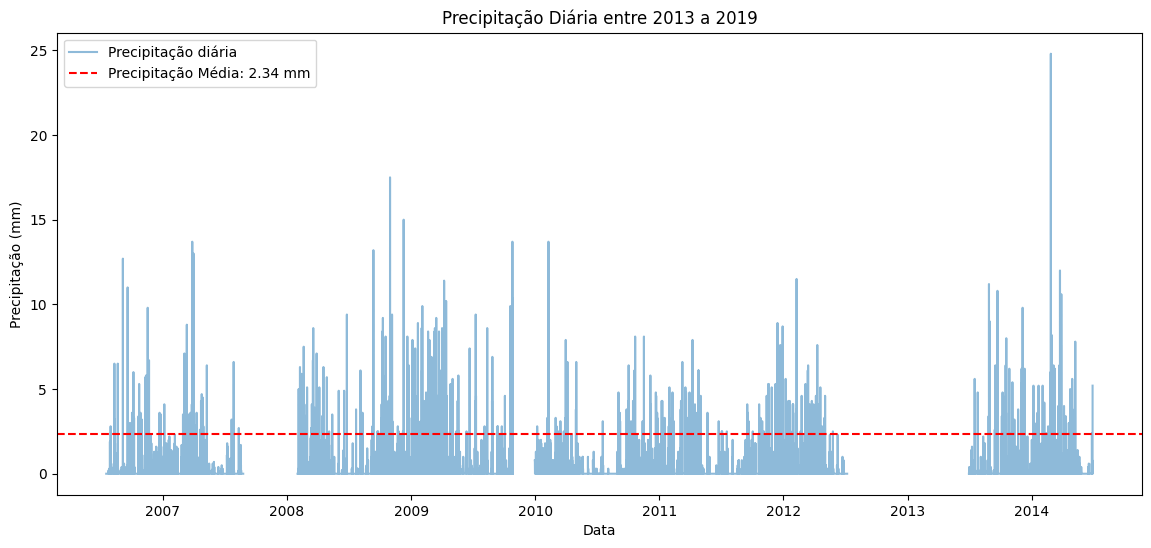

In [13]:

# Gráfico 1: Precipitação ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(dados['Data'], dados['Precipitation (mm)'], label='Precipitação diária', alpha=0.5)

 # Adicionar a linha de precipitação média com valor na legenda
plt.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

plt.title('Precipitação Diária entre 2013 a 2019')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()

plt.show()


/tmp/ipykernel_16152/7908492.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='1H')
/tmp/ipykernel_16152/7908492.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()
/tmp/ipykernel_16152/7908492.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_16152/7908492.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


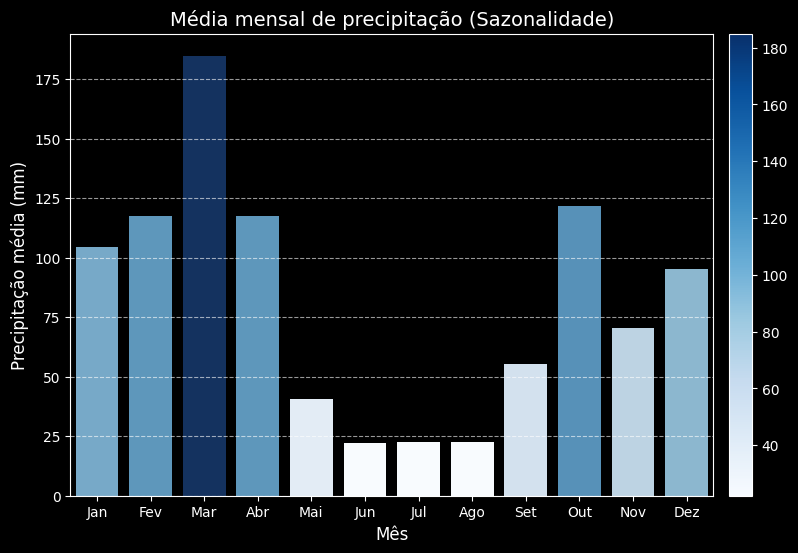

In [36]:
# Carregar os dados
f = "../../Weather Station Data/Llanganuco_PORTWX_17Jul06_28Jun14.csv"
dados = pd.read_csv(f, encoding="latin1")

# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Determinar os anos mínimo e máximo do conjunto de dados
min_year = dados['Datetime'].dt.year.min()
max_year = dados['Datetime'].dt.year.max()

# Definir o intervalo de datas abrangendo anos completos
start_date = f"{int(min_year)}-01-01 00:00"
end_date = f"{int(max_year)}-12-31 23:59"

# Criar um intervalo completo com frequência de 30 minutos
full_date_range = pd.date_range(start=start_date, end=end_date, freq='1H')

# Reindexar o DataFrame para o intervalo completo de datas e horários
dados.set_index('Datetime', inplace=True)
dados_full = dados.reindex(full_date_range)

# Renomear o índice para 'Datetime'
dados_full.index.name = 'Datetime'

# Adicionar uma coluna de ano para análise
dados_full['Ano'] = dados_full.index.year

# Calcular o percentual de valores ausentes por ano
percent_nan_por_ano = dados_full['Precipitation (mm)'].isna().groupby(dados_full['Ano']).mean() * 100

# Selecionar apenas os anos com menos de 10% de NaN
anos_validos = percent_nan_por_ano[percent_nan_por_ano < 20].index

# Filtrar o DataFrame para conter apenas os anos válidos
dados_filtrados = dados_full[dados_full['Ano'].isin(anos_validos)]

# Calcular a soma mensal da variável de precipitação
soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()

# Criar um DataFrame com mês e soma mensal
df = pd.DataFrame({'Data': soma_mensal.index, 'soma': soma_mensal.values})
df['Mês'] = df['Data'].dt.month

# Calcular a média mensal
media_mensal = df.groupby('Mês')['soma'].mean()

# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)

plt.style.use('dark_background')

# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('Blues', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de precipitação (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação média (mm)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
